In [1]:
import time
import numpy as np
from scipy.stats import ortho_group, special_ortho_group

import torch
from group_sampler import ortho_group_rvs, special_ortho_group_rvs

import matplotlib.pyplot as plt

# Timing and accuracy on GPU

Time sampling from groups and compare $R\cdot R^{-1}$ with the identity matrix.

In [2]:
time_dim = 1000
plot_dim = 100
time_dims = np.unique(np.logspace(1, 3, 10, dtype=int)).tolist()
n_repeat = 5

# Orthogonal group

In [3]:
%timeit ortho_group.rvs(time_dim)

13.2 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit ortho_group_rvs(time_dim)

276 ms ± 3.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit ortho_group_rvs(time_dim, dtype=torch.float64)

619 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
Ot32 = ortho_group_rvs(plot_dim)
Ot64 = ortho_group_rvs(plot_dim, dtype=torch.float64)
Osp = ortho_group.rvs(plot_dim)
eye = np.eye(plot_dim)

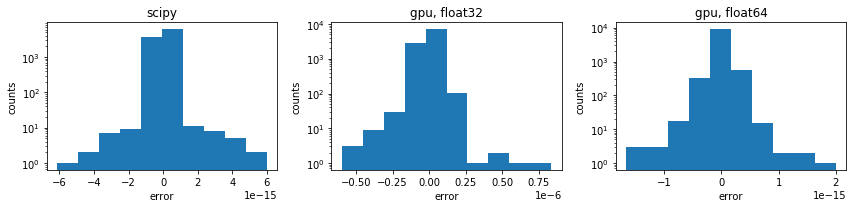

In [17]:
f, axes = plt.subplots(1, 3, figsize=(12, 3))
(ax1, ax2, ax3) = axes
ax1.hist((Osp.dot(Osp.T) - eye).ravel())
ax2.hist((torch.mm(Ot32, Ot32.t()).cpu().numpy() - eye).ravel())
ax3.hist((torch.mm(Ot64, Ot64.t()).cpu().numpy() - eye).ravel())
ax1.set_title('scipy')
ax2.set_title('gpu, float32')
ax3.set_title('gpu, float64')
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylabel('counts')
    ax.set_xlabel('error')
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
f.tight_layout()

In [8]:
times = np.zeros((2, len(time_dims), n_repeat))
for ii, dim in enumerate(time_dims):
    for jj in range(n_repeat):
        dim = int(dim)
        start = time.time()
        ortho_group.rvs(dim)
        times[0, ii, jj] = time.time() - start
        start = time.time()
        ortho_group_rvs(dim)
        times[1, ii, jj] = time.time() - start

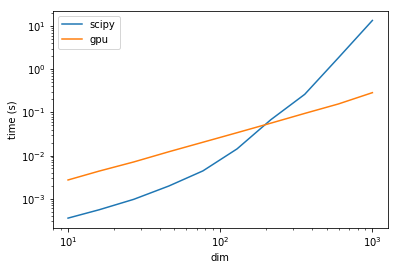

In [9]:
plt.plot(time_dims, np.median(times[0], axis=-1), label='scipy')
plt.plot(time_dims, np.median(times[1], axis=-1), label='gpu')
plt.xlabel('dim')
plt.ylabel('time (s)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

# Special orthogonal group

In [10]:
%timeit special_ortho_group.rvs(time_dim)

13.7 s ± 384 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit special_ortho_group_rvs(time_dim)

268 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit special_ortho_group_rvs(time_dim, dtype=torch.float64)

597 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
SOt32 = ortho_group_rvs(plot_dim)
SOt64 = ortho_group_rvs(plot_dim, dtype=torch.float64)
SOsp = ortho_group.rvs(plot_dim)
eye = np.eye(plot_dim)

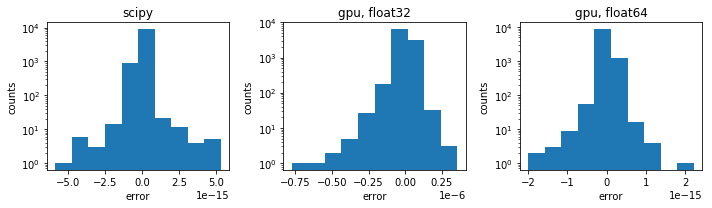

In [18]:
f, axes = plt.subplots(1, 3, figsize=(10, 3))
(ax1, ax2, ax3) = axes
ax1.hist((SOsp.dot(SOsp.T) - eye).ravel())
ax2.hist((torch.mm(SOt32, SOt32.t()).cpu().numpy() - eye).ravel())
ax3.hist((torch.mm(SOt64, SOt64.t()).cpu().numpy() - eye).ravel())
ax1.set_title('scipy')
ax2.set_title('gpu, float32')
ax3.set_title('gpu, float64')
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylabel('counts')
    ax.set_xlabel('error')
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
f.tight_layout()

In [15]:
times = np.zeros((2, len(time_dims), n_repeat))
for ii, dim in enumerate(time_dims):
    for jj in range(n_repeat):
        dim = int(dim)
        start = time.time()
        special_ortho_group.rvs(dim)
        times[0, ii, jj] = time.time() - start
        start = time.time()
        special_ortho_group_rvs(dim)
        times[1, ii, jj] = time.time() - start

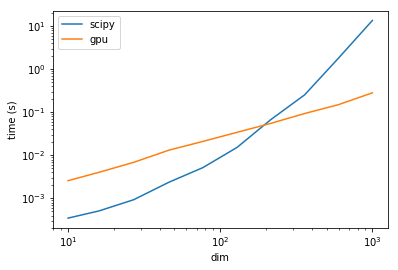

In [16]:
plt.plot(time_dims, np.median(times[0], axis=-1), label='scipy')
plt.plot(time_dims, np.median(times[1], axis=-1), label='gpu')
plt.xlabel('dim')
plt.ylabel('time (s)')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')